<a href="https://colab.research.google.com/github/emrefkrlr/DataScienceJourneyWithSampleProjects/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
vehicles_df = pd.read_csv('/content/originalData.csv')
copy_df = vehicles_df.copy()

# Veri Ön İşleme

In [38]:
# Veri setinde yer alan değişken tipleri, isimlendirmeleri, sayısı ve isimleri hakkında genel bilgi
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17835 entries, 0 to 24186
Columns: 2291 entries, year to fuel_type_Regular Unleaded
dtypes: float64(4), int64(3), uint8(2284)
memory usage: 39.9 MB


In [4]:
vehicles_df.columns = vehicles_df.columns.str.replace("\n", "")
vehicles_df.columns = vehicles_df.columns.str.replace("\t", "")
vehicles_df.columns = vehicles_df.columns.str.strip()
vehicles_df.columns = vehicles_df.columns.str.lower()
vehicles_df.columns = vehicles_df.columns.str.replace(" ", "_")
vehicles_df.columns

Index(['unnamed:_0', 'year', 'make', 'model', 'kilometres', 'body_type',
       'engine', 'transmission', 'drivetrain', 'exterior_colour',
       'interior_colour', 'passengers', 'doors', 'fuel_type', 'city',
       'highway', 'price'],
      dtype='object')

In [5]:
vehicles_df[["kilometres", "passengers", "doors", "city", "highway"]].head()

,kilometres,passengers,doors,city,highway
0,53052 km,NaN,NaN,12.2L/100km,9.0L - 9.5L/100km
1,77127 km,NaN,NaN,12.6L/100km,9.0L/100km
2,33032 km,5.0,4,11.0L/100km,8.6L/100km
3,50702 km,NaN,NaN,11.0L/100km,8.6L/100km
4,67950 km,NaN,NaN,11.3L/100km,9.1L/100km


In [6]:
not_none_kilometers = vehicles_df.kilometres[vehicles_df.kilometres.notnull()]
kilometers = not_none_kilometers.str.split(" ", expand=True)
vehicles_df["n_kilometers"] = kilometers[0].astype("int64")

not_none_spent_city_per100 = vehicles_df.city[vehicles_df.city.notnull()]
spent_city_per100 = not_none_spent_city_per100.str.split("L", expand=True)
vehicles_df["n_city"] = spent_city_per100[0].astype("float64")


not_none_spent_highway_per100 = vehicles_df.highway[vehicles_df.highway.notnull()]
spent_highway_per100 = not_none_spent_highway_per100.str.split("L", expand=True)
vehicles_df["n_highway"] = spent_highway_per100[0].astype("float64")

In [7]:
vehicles_df["doors"].value_counts(sort=True)

4                     14313
2                      2907
4 doors                1004
5                       675
5 doors                 361
2 doors                 219
3                        89
3 doors                  39
Other/Donât Know        3
2.0                       1
Name: doors, dtype: int64

In [8]:
not_none_doors = vehicles_df.doors[vehicles_df.doors.notnull()]
doors = not_none_doors.str.replace(" doors", "")
doors = doors.str.replace("Other/Donât Know", "0")
vehicles_df["n_doors"] = doors.astype("float64")

In [9]:
vehicles_df.head()

,unnamed:_0,year,make,model,kilometres,body_type,engine,transmission,drivetrain,exterior_colour,...,passengers,doors,fuel_type,city,highway,price,n_kilometers,n_city,n_highway,n_doors
0,0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,...,NaN,NaN,Gas,12.2L/100km,9.0L - 9.5L/100km,43880,53052.0,12.2,9.0,NaN
1,1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,...,NaN,NaN,Gas,12.6L/100km,9.0L/100km,36486,77127.0,12.6,9.0,NaN
2,2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,...,5.0,4,Premium Unleaded,11.0L/100km,8.6L/100km,40888,33032.0,11.0,8.6,4.0
3,3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,...,NaN,NaN,Gas,11.0L/100km,8.6L/100km,44599,50702.0,11.0,8.6,NaN
4,4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,...,NaN,NaN,Gas,11.3L/100km,9.1L/100km,46989,67950.0,11.3,9.1,NaN


In [10]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24198 entries, 0 to 24197
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed:_0       24198 non-null  int64  
 1   year             24198 non-null  int64  
 2   make             24198 non-null  object 
 3   model            24198 non-null  object 
 4   kilometres       23965 non-null  object 
 5   body_type        22968 non-null  object 
 6   engine           22136 non-null  object 
 7   transmission     22854 non-null  object 
 8   drivetrain       22967 non-null  object 
 9   exterior_colour  23182 non-null  object 
 10  interior_colour  16418 non-null  object 
 11  passengers       12025 non-null  float64
 12  doors            19611 non-null  object 
 13  fuel_type        23464 non-null  object 
 14  city             17835 non-null  object 
 15  highway          17835 non-null  object 
 16  price            24198 non-null  int64  
 17  n_kilometers

In [11]:
vehicles_df = vehicles_df.drop(["unnamed:_0", "kilometres", "doors", "city", "highway"], axis=1)

In [12]:
vehicles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,24198.0,2018.263534,5.155973,1928.0,2016.0,2019.0,2022.0,2024.0
passengers,12025.0,5.097963,1.009955,2.0,5.0,5.0,5.0,15.0
price,24198.0,50071.237458,74622.723965,500.0,23685.0,36990.0,59980.0,3999998.0
n_kilometers,23965.0,69608.975005,73256.609552,0.0,7701.0,54223.0,108000.0,2470000.0
n_city,17835.0,11.238357,2.587753,2.3,9.3,11.1,12.8,39.2
n_highway,17835.0,8.431797,1.850046,2.6,7.2,8.4,9.5,42.8
n_doors,19611.0,3.726786,0.790565,0.0,4.0,4.0,4.0,5.0


# Eksik Gözlem İncelemesi

In [17]:
total_missing = vehicles_df[vehicles_df.isnull().any(axis=1)].count().sum()
total_filled = vehicles_df[vehicles_df.notnull().all(axis=1)].count().sum()
print("""
Eksik Gözlem Sayısı:  {}
Dolu Gözlem Sayısı:   {}
Oran:                 {}
""".format(total_missing, total_filled, total_missing/(total_missing+total_filled)))


Eksik Gözlem Sayısı:  223060
Dolu Gözlem Sayısı:   118992
Oran:                 0.6521230690070515



In [18]:
# Tüm değişkenlerde Null olan gözlemleri silmek için.
vehicles_df.dropna(how= 'all')

,year,make,model,body_type,engine,transmission,drivetrain,exterior_colour,interior_colour,passengers,fuel_type,price,n_kilometers,n_city,n_highway,n_doors
0,2019,Acura,MDX,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,Gas,43880,53052.0,12.2,9.0,NaN
1,2018,Acura,MDX,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,Gas,36486,77127.0,12.6,9.0,NaN
2,2019,Acura,RDX,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,Premium Unleaded,40888,33032.0,11.0,8.6,4.0
3,2020,Acura,RDX,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,Gas,44599,50702.0,11.0,8.6,NaN
4,2021,Acura,RDX,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,Gas,46989,67950.0,11.3,9.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24193,2017,Volvo,S90,Sedan,NaN,Automatic,AWD,White,NaN,NaN,Gasoline,34680,81000.0,NaN,NaN,5.0
24194,2020,Volvo,XC40,SUV,2.0,Automatic,AWD,Black,Black,5.0,Gas,35898,92450.0,NaN,NaN,5.0
24195,2017,Volvo,XC90,Hatchback,NaN,Automatic,AWD,Grey,NaN,NaN,Gasoline,38000,92000.0,NaN,NaN,4.0
24196,2018,Volvo,XC90,NaN,NaN,Automatic,AWD,Black,NaN,NaN,Gasoline,45000,67000.0,NaN,NaN,4.0


In [21]:
import missingno as msno
import seaborn as sns

<Axes: >

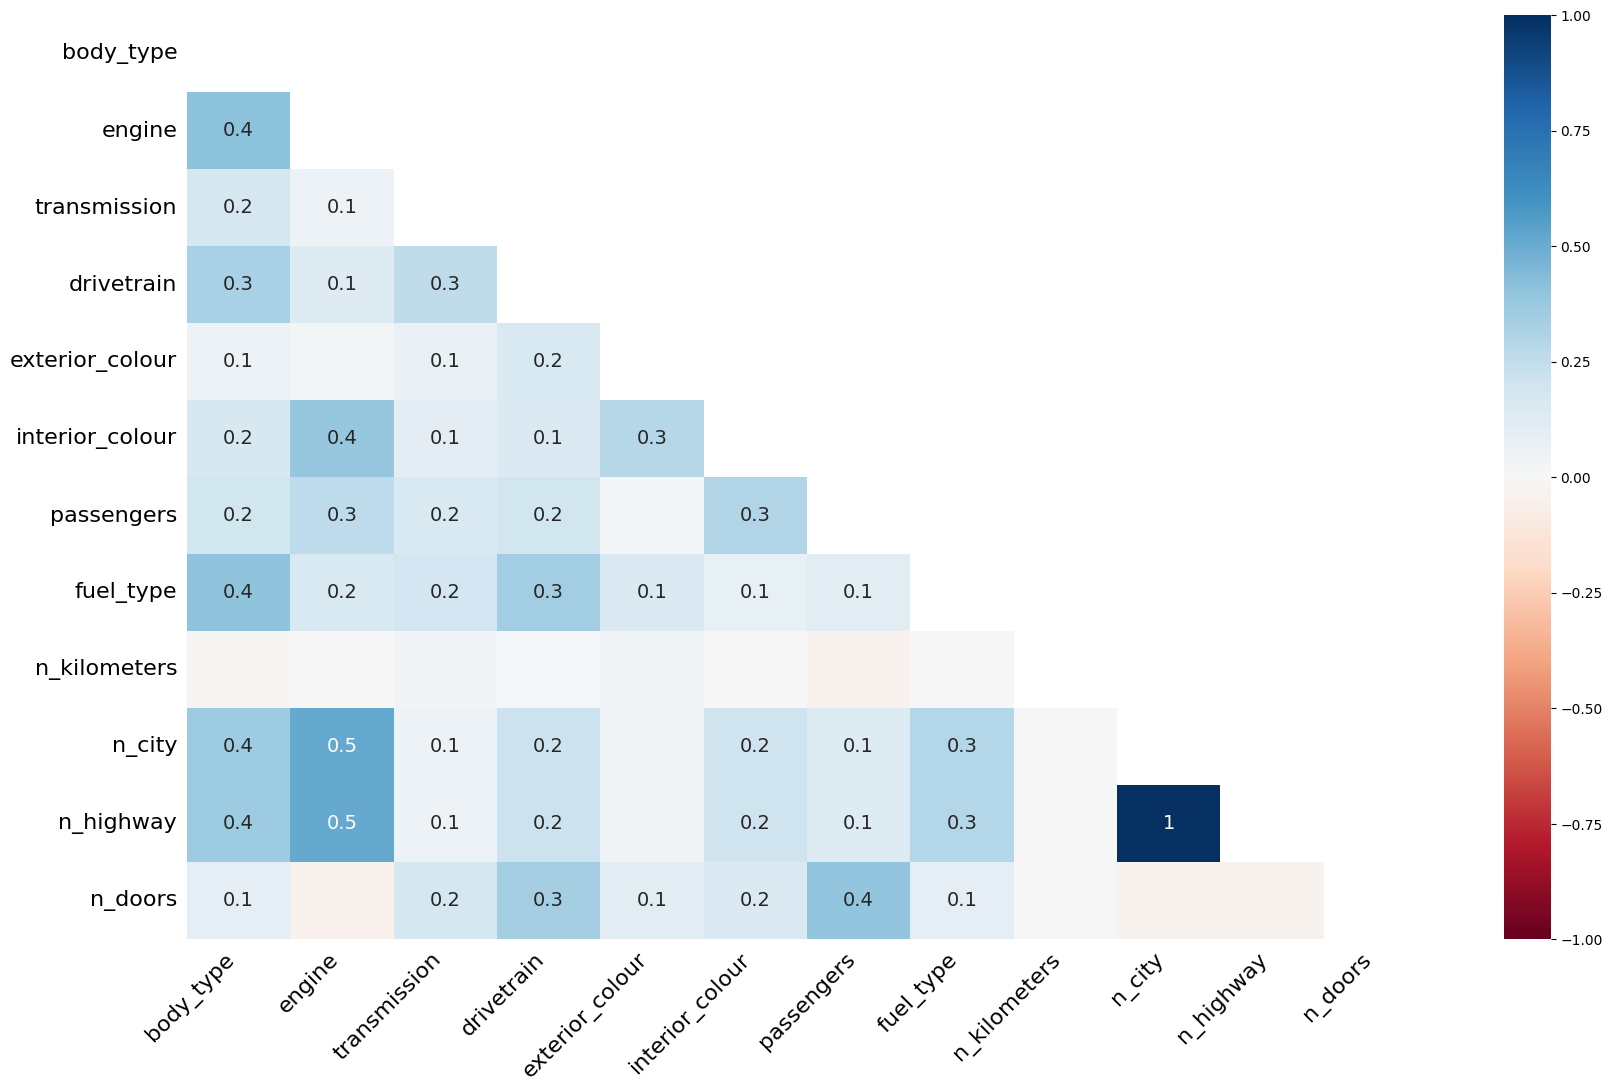

In [20]:
# Yokluk kolerasyonunun incelenmesi
msno.heatmap(vehicles_df)

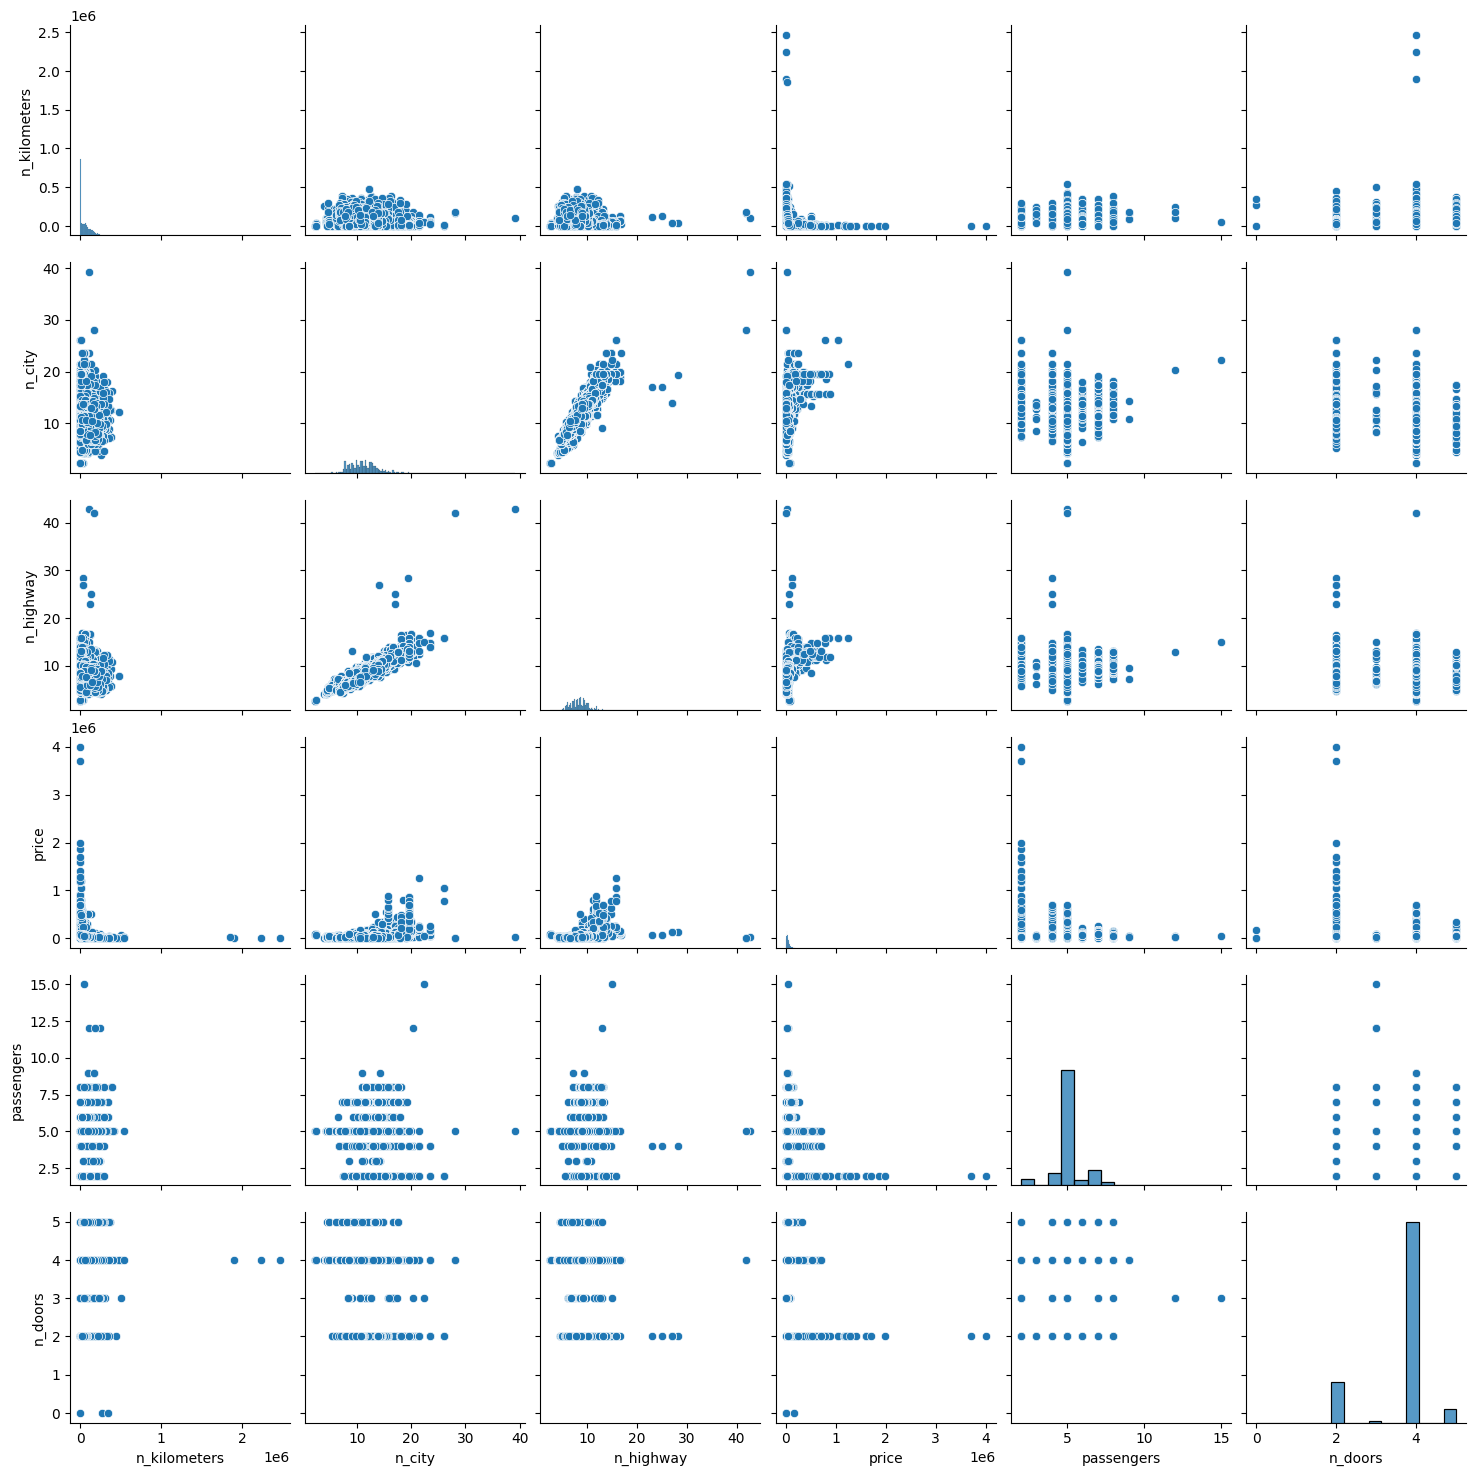

In [24]:
# Sürekli değişkenler için kolrelasyonu inceliyorum. Kesikli değişkenlerin dağılımını görmek için ekliyorum.
sns.pairplot(vehicles_df[["n_kilometers", "n_city", "n_highway", "price", "passengers", "n_doors"]])

In [23]:
vehicles_df.isnull().sum()

year                   0
make                   0
model                  0
body_type           1230
engine              2062
transmission        1344
drivetrain          1231
exterior_colour     1016
interior_colour     7780
passengers         12173
fuel_type            734
price                  0
n_kilometers         233
n_city              6363
n_highway           6363
n_doors             4587
dtype: int64

In [25]:
# Kesikli değişkenler için NA gözlemleri ortalamaları ile dolduruyorum.
vehicles_df["n_doors"] = vehicles_df["n_doors"].fillna(vehicles_df["n_doors"].mean()).round(0)
vehicles_df["passengers"] = vehicles_df["passengers"].fillna(vehicles_df["passengers"].mean()).round(0)

In [26]:
# city ve highway deki boşluklar incelendiğinde yapısal bir problem olduğu açıktır. 
#Ancak modele devam etmek için bu değerlerin her ikisininde boş olduğu gözlemleri silerek devam edeceğim.
index_c_h = vehicles_df[(vehicles_df["n_city"].isnull()) & (vehicles_df["n_highway"].isnull())].index
vehicles_df.drop(index_c_h, inplace=True)

In [27]:
vehicles_df.dtypes

year                 int64
make                object
model               object
body_type           object
engine              object
transmission        object
drivetrain          object
exterior_colour     object
interior_colour     object
passengers         float64
fuel_type           object
price                int64
n_kilometers       float64
n_city             float64
n_highway          float64
n_doors            float64
dtype: object

In [28]:
# Doldurma işlemlerinden sonra kesikli ve sürekli değişkenlerin tiplerini tekrar düzenliyorum.
vehicles_df["passengers"] = vehicles_df["passengers"].astype("int64")
vehicles_df["n_doors"] = vehicles_df["n_doors"].astype("int64")
vehicles_df["price"] = vehicles_df["price"].astype("float64")

In [29]:
# Kategorik değişkenlerde eksik gözlemlerin doldurulması için KNN algoritmasını kullancağım.
# Modele hazırlamak için bu değişkenleri dönüştürüyorum

vehicles_df=pd.get_dummies(
    vehicles_df, columns= ["engine", "transmission","drivetrain", "exterior_colour", "interior_colour", "fuel_type"], 
    prefix=["engine", "transmission","drivetrain", "exterior_colour", "interior_colour", "fuel_type"])

In [30]:
# Dönüştürme işlemi ile birlikte veri setinin son durumu
vehicles_df.head()

,year,make,model,body_type,passengers,price,n_kilometers,n_city,n_highway,n_doors,...,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gas,fuel_type_Gas/Electric Hybrid,fuel_type_Gaseous Fuel Compatible,fuel_type_Gasoline Fuel,fuel_type_Gasoline Hybrid,fuel_type_Other,fuel_type_Premium Unleaded,fuel_type_Regular Unleaded
0,2019,Acura,MDX,SUV,5,43880.0,53052.0,12.2,9.0,4,...,0,0,1,0,0,0,0,0,0,0
1,2018,Acura,MDX,SUV,5,36486.0,77127.0,12.6,9.0,4,...,0,0,1,0,0,0,0,0,0,0
2,2019,Acura,RDX,SUV,5,40888.0,33032.0,11.0,8.6,4,...,0,0,0,0,0,0,0,0,1,0
3,2020,Acura,RDX,SUV,5,44599.0,50702.0,11.0,8.6,4,...,0,0,1,0,0,0,0,0,0,0
4,2021,Acura,RDX,SUV,5,46989.0,67950.0,11.3,9.1,4,...,0,0,1,0,0,0,0,0,0,0


In [32]:
# Dönüştürme sonrası sözel olarak ifade edilen değerlerin sayısal karşılıkları eklenmiş oldu.
# Orjinal değerlerin veri setimden çıkarıyorum

vehicles_df = vehicles_df.select_dtypes(exclude=[object])
vehicles_df.dtypes

year                            int64
passengers                      int64
price                         float64
n_kilometers                  float64
n_city                        float64
                               ...   
fuel_type_Gasoline Fuel         uint8
fuel_type_Gasoline Hybrid       uint8
fuel_type_Other                 uint8
fuel_type_Premium Unleaded      uint8
fuel_type_Regular Unleaded      uint8
Length: 2291, dtype: object

# KNN Algoritması ile Eksik Gözlemlerin Doldurulması

In [ ]:
!pip install ycimpute

In [35]:
from ycimpute.imputer import knnimput

In [36]:
# KNN değerleri vermek için veri setimi düzenliyorum. Yaptığım işlem;
# Veri setimin kolon isimlerini bir değişkende tutmak.
# Gözlem değerleri numpy array' ine almak


var_names = list(vehicles_df)
n_df = np.array(vehicles_df)

In [ ]:
# KNN ile eksik gözlemleri dolduruyorum.
# Gözlemleri en yakın 5 komşusuna göre doldur diyorum.

knn_df = knnimput.KNN(k=5).complete(n_df)

In [52]:
# Veri setimi tekrar Pandas Data Frame çevirip kontrol ediyorum
vehicles_df = pd.DataFrame(knn_df, columns=var_names)
vehicles_df.isnull().sum()

year                          0
passengers                    0
price                         0
n_kilometers                  0
n_city                        0
                             ..
fuel_type_Gasoline Fuel       0
fuel_type_Gasoline Hybrid     0
fuel_type_Other               0
fuel_type_Premium Unleaded    0
fuel_type_Regular Unleaded    0
Length: 2291, dtype: int64

# Aykırı Gözlemlerin Belirlenmesi ve Giderilmesi

- Çok değişkenli veri setlerinde tek bir aykırı gözleme odaklanarak işlem yapmak yada bunlar üzerinde tek tek işlem yapmak doğru değildir. 
- Bir değikende gözlemlerdeki aykırılık diğer gözlemlerde veri setinin içerisindeki eğilimi anlamlı olarak etkileyebilir.
- Tam tersi durumlar içinde geçerlidir. Yani tek başına aykırı gözlem
olarak anlamlandırılamayacağı durumda eş zamanlı olarka gözlemlendiğinde aykırı olarak değerlendirilir.

* Gözlemler yoğunluklarına göre değerlendirilirek aykırılık gözlenmektedir.

In [43]:
from sklearn.neighbors import LocalOutlierFactor

In [53]:
clf = LocalOutlierFactor(n_neighbors= 20 , contamination= 0.1)
clf.fit_predict(vehicles_df)
clf_score = clf.negative_outlier_factor_
np.sort(clf_score)[0:120]

array([-9.8441458 , -9.59267693, -9.34101113, -8.61171886, -8.61171886,
       -7.88940388, -7.83545744, -7.01362458, -7.01362458, -6.97290201,
       -6.74156483, -6.73572447, -6.5716869 , -6.55377048, -6.06208254,
       -6.02086523, -5.88513132, -5.65893427, -5.62396974, -5.61830451,
       -5.45204917, -5.35444521, -5.31132657, -5.29572437, -5.16344641,
       -5.13038761, -4.99720197, -4.99720197, -4.9252145 , -4.92059176,
       -4.71274631, -4.62751537, -4.53338626, -4.50687544, -4.42740414,
       -4.36328907, -4.34061256, -4.33606936, -4.33606936, -4.33606936,
       -4.21147079, -4.16797893, -4.09148442, -4.08164733, -3.9894285 ,
       -3.97977075, -3.8671643 , -3.85484655, -3.85484655, -3.85484655,
       -3.83849419, -3.83849419, -3.83849419, -3.82860157, -3.82860157,
       -3.82285828, -3.82285828, -3.82285828, -3.78703615, -3.76643412,
       -3.72863692, -3.69830756, -3.69830756, -3.69527078, -3.69184637,
       -3.67052832, -3.65326624, -3.635351  , -3.63330354, -3.62

In [54]:
# Aykırıkları çıkarmadan önce
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17835 entries, 0 to 17834
Columns: 2291 entries, year to fuel_type_Regular Unleaded
dtypes: float64(2291)
memory usage: 311.7 MB


In [55]:
# Çıktıya göre burada sınır belirlememiz gerekiyor. 
# Tanım itibari ile LocalOutlierFactor bize gözlemler için komşuları arasındaki yoğunluk mesafeleri veriyor.
# Burada gözlemler arasındaki farkın görece en minumuma indiği (yumuşak geçişin sağlandığı) seti sınır değeri olarak alacağız.

# -5.35444521 değerini seçiyorum
threshold_value = np.sort(clf_score)[22]

# Bu sınırın altındaki tüm gözlemleri veri setinden çıkarıyorum.
vehicles_df = vehicles_df[clf_score > threshold_value]
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17834
Columns: 2291 entries, year to fuel_type_Regular Unleaded
dtypes: float64(2291)
memory usage: 311.5 MB


# Model Kurmak ve Tahminleme

Veri setini ön işleme adımlarında incelediğimizde odaklanacağımız price bağımlı değişkeni diğer sürekli değişkenlerce açıklanmadığını yani doğrusallıktan söz edilemez.

Bu nedenle doğrusal modellerin kurulması bu veri seti için anlamlı sonuçlar vermeyecektir.

Yukarıdaki ön görümüzü ispatlamak adına Çok Değişkenli Regreson Modeli ile test edelim.

## 1- Çok Değişkenli Regresyon

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [57]:
# Veri seti içerisinde bağımlı ve bağımsız değişkenleri ayırıyorum

independent_variables = vehicles_df.drop("price", axis=1)
dependent_variables = vehicles_df["price"]

In [58]:
# Train ve Test datasının ayrılması

iv_train, iv_test, dv_train, dv_test = train_test_split(independent_variables, dependent_variables, test_size=0.20, random_state=42)

In [59]:
# Modelin kurulması

lr_model = LinearRegression().fit(iv_train, dv_train)

In [61]:
# Aynı modeli SM kütüphanesi ile kuruyorum. Çıktılarını gösterebilmek için. (Bu adım gerekli değil)

sm_model =  sm.OLS(dv_train, iv_train).fit()

In [62]:
sm_model.summary().tables[0]

Dep. Variable:,price,R-squared:,0.845
Model:,OLS,Adj. R-squared:,0.819
Method:,Least Squares,F-statistic:,32.23
Date:,"Tue, 02 May 2023",Prob (F-statistic):,0.00
Time:,23:06:30,Log-Likelihood:,-1.5990e+05
No. Observations:,14249,AIC:,3.239e+05
Df Residuals:,12189,BIC:,3.395e+05
Df Model:,2059,,
Covariance Type:,nonrobust,,


**Adj. R-squared:	0.819**
- Bağımsız değikenlerin bağımlı değişkenleri açıklama oranı %82 dir.

---

**Prob (F-statistic):	0.00**
- Bağımlı değişkeni açıklama için kurulan model anlamsızdır.

In [63]:
# Model üzerinden tahminleme işlemi

dv_pred = lr_model.predict(iv_test)

In [85]:
# Hata Kareler Ortalamasının Karekökü
# Tahminin gerçek değerden olan uzaklığının karekökü

lr_rmse = np.sqrt(mean_squared_error(dv_test, dv_pred))
lr_rmse

30827.66335889915

# 2- CART (Karar Ağaçları - Regresyon Ağaçları)

Probemimiz doğrusal olmadı için en uygun modellerden biri **Karar Ağaçlarıdır.**

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [71]:
# Modelin kurulması

cart_model = DecisionTreeRegressor().fit(iv_train, dv_train)

In [81]:
# Tahminleme

dv_pred_cart = cart_model.predict(iv_test)

In [84]:
# Hata Kareler Ortalamasının Karekökü
# Tahminin gerçek değerden olan uzaklığının karekökü

cart_rmse = np.sqrt(mean_squared_error(dv_test, dv_pred_cart))
cart_rmse

27684.8550671023

**27684.8550671023** 

Burada değeri yorumlayacak olursak RMSE değerimiz doğrusal regresyona göre düştü ancak buradaki amaç hata kareler ortalamasını mümkün olduğunca düşürmek (0 'a yaklaştırmak).

Standartlaştırma işlemi uygulayarak tüm değerleri -3 ile +3 arasında değerlere yerleştiriyor. Burada gözlemlerin veri seti içerisindeki temsiliyeti bozulmuyor.

Nedeni makine öğrenmesi algoritmalarında, birbirinden çok farklı veri tipleri ve ölçeklerin olması çoğu algoritmaların doğru çalışmasına engel oluyor. Veri setindeki ölçek tiplerinin farklılığı arttıkça standartlaştırma işlemleri uygulanmalıdır.

In [83]:
from sklearn import preprocessing

In [88]:
# Veri seti içerisinde bağımlı ve bağımsız değişkenleri ayırıyorum

pp_independent_variables = vehicles_df.drop("price", axis=1)
pp_dependent_variables = vehicles_df["price"]


In [90]:
# Ayrı ayrı standartlaştırma işlemini uyguluyorum
pp_independent_df = preprocessing.scale(pp_independent_variables)
pp_dependent_df = preprocessing.scale(pp_dependent_variables)

# Standartlaştırılmış gözlemleri Test ve Train olarak bölüyorum
p_iv_train, p_iv_test = train_test_split(pp_independent_df, test_size=0.20, random_state=42)
p_dv_train, p_dv_test = train_test_split(pp_dependent_df, test_size=0.20, random_state=42)

In [91]:
# Modelin Kurulması

p_cart_model = DecisionTreeRegressor().fit(p_iv_train, p_dv_train)

In [95]:
# Tahminleme

p_dv_pred_cart = p_cart_model.predict(p_iv_test)

In [96]:
# Hata Kareler Ortalamasının Karekökü
# Tahminin gerçek değerden olan uzaklığının karekökü

p_cart_rmse = np.sqrt(mean_squared_error(p_dv_test, p_dv_pred_cart))
p_cart_rmse

0.5509952539340681

# Kurulan Modelin Çıktısını Almak

In [ ]:
!pip install skompiler
!pip install astor

In [100]:
from skompiler import skompile

In [101]:
cart_model_sk = skompile(p_cart_model.predict).to("python/code")

In [102]:
cart_model_sk

'(((((((((((((-0.7427336160649847 if x[167] <= 66.72518111136742 else \n    -0.7214322146456579) if x[4] <= -1.5028563737869263 else ((((((((((\n    0.04708641848897023 if x[1024] <= 4.314410917460918 else \n    0.048155765949779814) if x[1608] <= 4.80265424028039 else \n    0.05082913460180376) if x[1011] <= 18.48752675112337 else \n    0.04173968118492234) if x[1430] <= 38.51731421658769 else \n    0.03104620657682655) if x[985] <= 3.4556670263409615 else \n    0.10004050474826041) if x[0] <= 0.9854654669761658 else (\n    0.03374096217806676 if x[2] <= -1.0374300479888916 else \n    0.0027298858145890603 if x[1608] <= 4.80265424028039 else \n    -0.028388125294969837) if x[2265] <= -0.1730954349040985 else \n    0.06464510379546352) if x[2247] <= 47.17785655846819 else \n    -0.02935053800969846) if x[1514] <= 2.2526763156056404 else \n    -0.013331713046770968 if x[1] <= -2.2535586953163147 else \n    0.035858270150469655) if x[995] <= 3.3698392808437347 else \n    -0.0154917949176